In [1]:
import numpy as np
import matplotlib.pyplot as plt

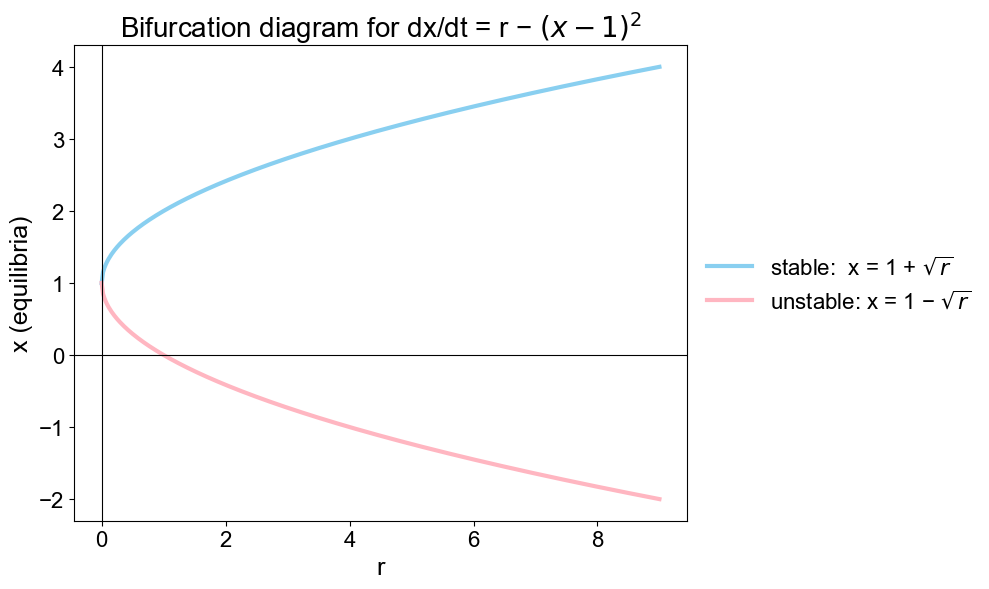

In [15]:
# Bifurcation diagram for: dx/dt = r - (x - 1)^2

# Parameter range (real equilibria exist only for r >= 0)
r_max = 9.0
r = np.linspace(0.0, r_max, 400)

# Equilibria: (x - 1)^2 = r  ->  x = 1 ± sqrt(r)
x_stable   = 1 + np.sqrt(r)   # f'(x) = -2(x-1) < 0  -> stable
x_unstable = 1 - np.sqrt(r)   # f'(x) = -2(x-1) > 0  -> unstable

# Visualization
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 6))
plt.plot(r, x_stable,   '-',  lw=3, color='#89CFF0', label='stable:  x = 1 + $\sqrt{r}$')
plt.plot(r, x_unstable, '-',  lw=3, color='#FFB6C1',  label='unstable: x = 1 − $\sqrt{r}$')

# Axes & labels
plt.axvline(0, color='k', lw=0.8)
plt.axhline(0, color='k', lw=0.8)
plt.grid(False)
plt.xlabel('r', fontsize=18)
plt.ylabel('x (equilibria)' ,fontsize =18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Bifurcation diagram for dx/dt = r − $(x − 1)^2$", fontsize=20)
plt.legend(frameon=False, loc='center left',bbox_to_anchor=(1, 0.5), fontsize=16)
plt.tight_layout()

# Save to file
plt.savefig('/Users/haowenhu/Documents/GitHub/sysen6000/Assignment_3/results/bifurcation_system_1a.png', dpi=300)

plt.show()


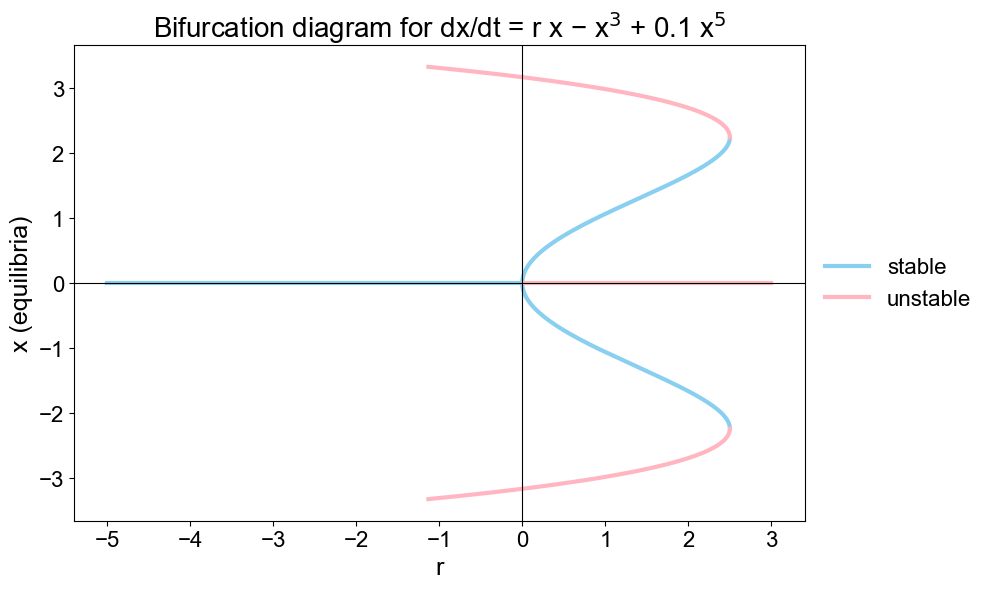

In [18]:
# Bifurcation diagram for: dx/dt = r x - x**3 + 0.1 x**5

# ----- Parameterization by x for nonzero equilibria -----
# r = 2.5
x_max = np.sqrt(10) * 1.05 
x = np.linspace(-x_max, x_max, 2000)
r_x = x**2 - 0.1 * x**4

# Stability on nonzero branches: f'(x) = 0.4 x^2 (x^2 - 5)
fp = 0.4 * x**2 * (x**2 - 5.0)
stable_mask = (fp < 0)
unstable_mask = (fp > 0)

# ----- The x = 0 branch (exists for all r): r-axis line -----
# Stable for r < 0, unstable for r > 0
r_line = np.linspace(-5.0, 3.0, 600) 
x_zero = np.zeros_like(r_line)
x0_stable = (r_line < 0)
x0_unstable = (r_line > 0)

# ----- Visualization -----
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 6))

# nonzero stable (blue) and unstable (pink) branches
# Separate positive and negative x branches
mask_pos = x >= 0
mask_neg = x <= 0

# Plot each branch separately
plt.plot(r_x[mask_pos & stable_mask],   x[mask_pos & stable_mask], '-', lw=3, color='#89CFF0')
plt.plot(r_x[mask_pos & unstable_mask], x[mask_pos & unstable_mask], '-', lw=3, color='#FFB6C1')
plt.plot(r_x[mask_neg & stable_mask],   x[mask_neg & stable_mask], '-', lw=3, color='#89CFF0')
plt.plot(r_x[mask_neg & unstable_mask], x[mask_neg & unstable_mask], '-', lw=3, color='#FFB6C1')

# x=0 branch, split by stability
plt.plot(r_line[x0_stable],   x_zero[x0_stable],   '-', lw=3, color='#89CFF0',
         label='stable' if True else None)
plt.plot(r_line[x0_unstable], x_zero[x0_unstable], '-', lw=3, color='#FFB6C1',
         label='unstable' if True else None)

# Axes & labels
plt.axvline(0, color='k', lw=0.8)
plt.axhline(0, color='k', lw=0.8)
plt.grid(False)
plt.xlabel('r', fontsize=18)
plt.ylabel('x (equilibria)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Bifurcation diagram for dx/dt = r x − x$^3$ + 0.1 x$^5$", fontsize=20)

# Legend outside on the right
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.tight_layout()

# Save to file
plt.savefig('/Users/haowenhu/Documents/GitHub/sysen6000/Assignment_3/results/bifurcation_system_1b.png', dpi=300)

plt.show()


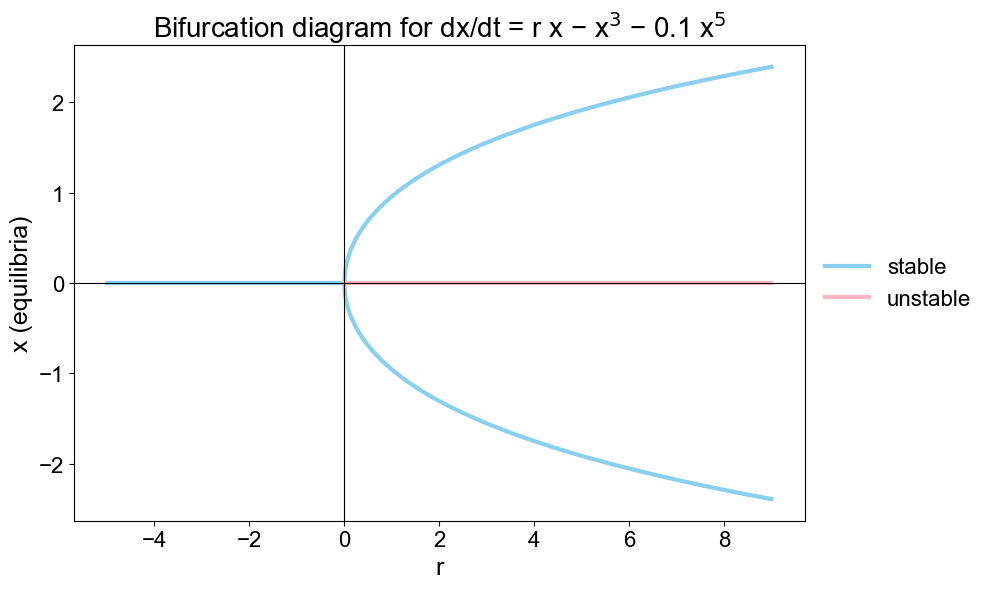

In [20]:
# Bifurcation diagram for: dx/dt = r x - x**3 - 0.1 x**5

# Parameter range
r_min, r_max = -5.0, 9.0
r = np.linspace(max(0.0, r_min), r_max, 600)  # nonzero equilibria exist only for r >= 0

# Nonzero equilibria expressed as functions of r
# x^2 = 5(-1 + sqrt(1 + 0.4 r)), valid for r >= 0
x2 = 5.0 * (-1.0 + np.sqrt(1.0 + 0.4 * r))
x_plus  =  np.sqrt(x2)           # stable
x_minus = -np.sqrt(x2)           # stable

# x = 0 branch (stable for r<0, unstable for r>0)
r_line = np.linspace(r_min, r_max, 600)
x_zero = np.zeros_like(r_line)
mask_stable_0   = (r_line < 0)
mask_unstable_0 = (r_line > 0)

# Visualization
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 6))

# Nonzero stable branches (blue)
plt.plot(r, x_plus,  '-', lw=3, color='#89CFF0')
plt.plot(r, x_minus, '-', lw=3, color='#89CFF0')

# x=0 branch split by stability
plt.plot(r_line[mask_stable_0],   x_zero[mask_stable_0],   '-', lw=3, color='#89CFF0',  label='stable')
plt.plot(r_line[mask_unstable_0], x_zero[mask_unstable_0], '-', lw=3, color='#FFB6C1',  label='unstable')

# Axes & labels
plt.axvline(0, color='k', lw=0.8)
plt.axhline(0, color='k', lw=0.8)
plt.grid(False)
plt.xlabel('r', fontsize=18)
plt.ylabel('x (equilibria)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Bifurcation diagram for dx/dt = r x − x$^3$ − 0.1 x$^5$", fontsize=20)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.tight_layout()

# Save to file
plt.savefig('/Users/haowenhu/Documents/GitHub/sysen6000/Assignment_3/results/bifurcation_system_1c.png', dpi=300)

plt.show()


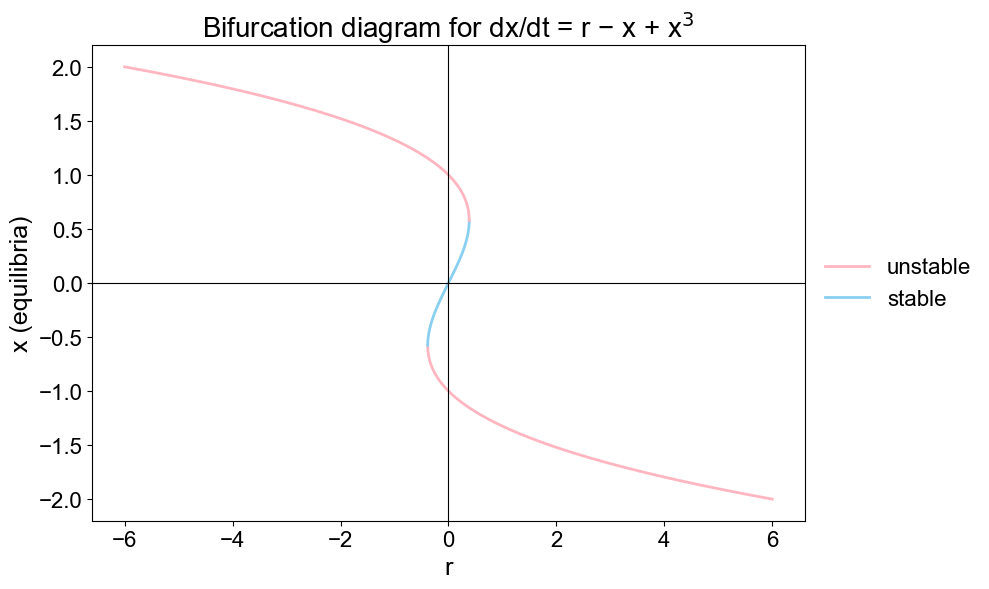

In [22]:
# Bifurcation diagram for: dx/dt = r - x + x**3

# Parameterization of equilibria by x: r(x) = x - x**3
# Turn points at x = ±1/sqrt(3), r = ±2/(3*sqrt(3))
x = np.linspace(-2.0, 2.0, 4000)
r_x = x - x**3

# Stability: f'(x) = -1 + 3 x^2
fp = -1.0 + 3.0 * x**2
stable_mask   = (fp < 0)                  # |x| < 1/sqrt(3)
unstable_mask = (fp > 0)                  # |x| > 1/sqrt(3)

# Visualization
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 6))

# Plot stable (blue) and unstable (pink) parts of the curve
# Separate regions by x
mask_left   = x < -1/np.sqrt(3)
mask_middle = (x >= -1/np.sqrt(3)) & (x <= 1/np.sqrt(3))
mask_right  = x > 1/np.sqrt(3)

# Plot each segment separately
plt.plot(r_x[mask_left],   x[mask_left],   '-', lw=2, color='#FFB6C1', label='unstable')
plt.plot(r_x[mask_middle], x[mask_middle], '-', lw=2, color='#89CFF0', label='stable')
plt.plot(r_x[mask_right],  x[mask_right],  '-', lw=2, color='#FFB6C1')

# Axes & labels
plt.axvline(0, color='k', lw=0.8)
plt.axhline(0, color='k', lw=0.8)
plt.grid(False)
plt.xlabel('r', fontsize=18)
plt.ylabel('x (equilibria)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Bifurcation diagram for dx/dt = r − x + x$^3$", fontsize=20)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.tight_layout()

# Save to file
plt.savefig('/Users/haowenhu/Documents/GitHub/sysen6000/Assignment_3/results/bifurcation_system_1d.png', dpi=300)

plt.show()
